Введите колличество строк в матрице:
3
Ведите строки матрицы:
1 2 3
2 2 2
1 2 3

Значение игры: 2
Оптимальная стратегия первого игрока:  0 |  1 |  0 |
Оптимальная стратегия второго игрока:  1 |  0 |  0 |
Визуализация спектра оптимальной стратегии 1-го игрока: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


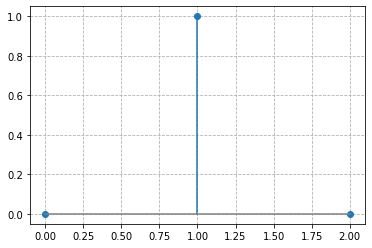


Визуализация спектра оптимальной стратегии 2-го игрока: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


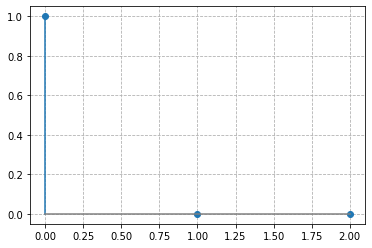

Введите колличество строк в матрице:
2
Ведите строки матрицы:
-1 2
4 5

Значение игры: 4
Оптимальная стратегия первого игрока:  0 |  1 |
Оптимальная стратегия второго игрока:  1 |  0 |
Визуализация спектра оптимальной стратегии 1-го игрока: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


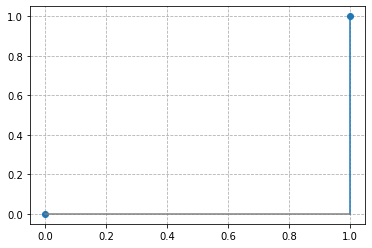


Визуализация спектра оптимальной стратегии 2-го игрока: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


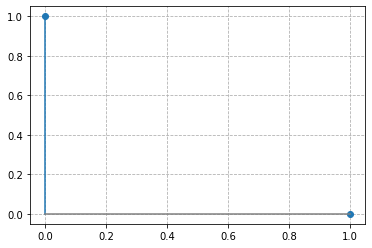

Введите колличество строк в матрице:
4
Ведите строки матрицы:
2 3 4 
3 3 3
-2 3 4
2 -10 2

Значение игры: 3
Оптимальная стратегия первого игрока:  0 |  1 |  0 |  0 |
Оптимальная стратегия второго игрока:  1 |  0 |  0 |
Визуализация спектра оптимальной стратегии 1-го игрока: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


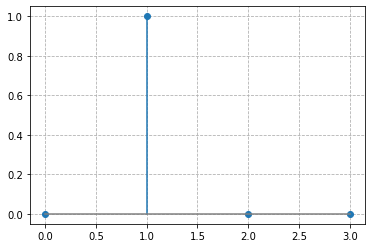


Визуализация спектра оптимальной стратегии 2-го игрока: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


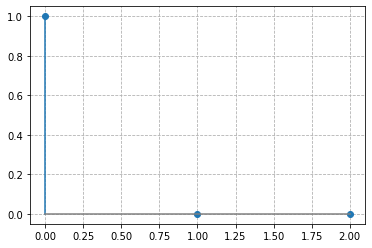

In [ ]:
import numpy as np
from scipy.optimize import linprog
import fractions

#Функция подсчета
def Nash_Equilibrium(a):
  b = a + abs(int(a.min())) + 1
  mas1 = b.transpose()
  opt = linprog(c = np.ones(len(b)), A_ub = mas1 * -1,
      b_ub = np.ones(len(b[0])) * -1, method = "revised simplex")
  out1 = opt.x * (1/np.sum(opt.x))
  mas2 = b
  opt = linprog(c = np.ones(len(b[0])) * -1, A_ub = mas2,
      b_ub = np.ones(len(b)), method = "revised simplex")
  out2 = opt.x * (1/np.sum(opt.x))
  out3 = 1/np.sum(opt.x) - (abs(int(a.min())) + 1)
  return list([out1, out2, out3])
  
#Функция печати и визуализации результата
%matplotlib inline
from matplotlib import pylab as plt
def Print_answer(a):
  print('\nЗначение игры: {1}'.format(str(a[2]), fractions.Fraction(str(a[2])).limit_denominator(1000)))
  output1 = list(map(lambda i: fractions.Fraction(i).limit_denominator(1000), a[0]))
  output2 = list(map(lambda i: fractions.Fraction(i).limit_denominator(1000), a[1]))
  print('Оптимальная стратегия первого игрока:',end = '')
  for i in output1: print(" ", i, "|", end = '')
  print('\nОптимальная стратегия второго игрока:',end = '')
  for i in output2: print(" ", i, "|", end = '')
  print("\nВизуализация спектра оптимальной стратегии 1-го игрока: ")
  x = np.arange(0,len(output1),1)
  y = a[0]
  plt.stem(x, y,basefmt= 'gray')
  plt.grid(True, linestyle='--')
  plt.show()
  print("\nВизуализация спектра оптимальной стратегии 2-го игрока: ")
  x = np.arange(0,len(output2),1)
  y = a[1]
  plt.stem(x, y,basefmt= 'gray')
  plt.grid(True, linestyle='--')
  plt.show()

for i in range(3):
  a = int(input("Введите колличество строк в матрице:\n"))
  print("Ведите строки матрицы:")
  mas = np.array([list(map(float, input().split()))])
  for i in range (a-1):
    mas = np.append(mas, [list(map(float, input().split()))], axis = 0)
  Print_answer(Nash_Equilibrium(mas))
